In [1]:
from game_test import *
from players_test import *

### Human Player Vs. AI

In [22]:
gomoku = Gomoku()

simple_alpha_beta_player_2 = alpha_beta_player(depth=2, evaluation_func=evaluate_game_state_simple)
improved_alpha_beta_player_2 = alpha_beta_player(depth=2, evaluation_func=evaluate_game_state_improved)
improved_alpha_beta_player_3 = alpha_beta_player(depth=3, evaluation_func=evaluate_game_state_improved)

result = gomoku.play_game(human_player, random_player)

Current board state:
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . W 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
List of legal moves at this state: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (

Enter your move as 'row,column' (e.g. 1,1):  1,1


Current board state:
B . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . W 
. . . . . . W . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
List of legal moves at this state: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), 

Enter your move as 'row,column' (e.g. 1,1):  2,1


Current board state:
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . W 
. . . . . . W . . W . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
List of legal moves at this state: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14),

Enter your move as 'row,column' (e.g. 1,1):  3,1


Current board state:
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . W 
. . . . . . W . . W . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . W . . . . . . 
List of legal moves at this state: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 1),

Enter your move as 'row,column' (e.g. 1,1):  4,1


Current board state:
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . W 
. . . . . . W . . W . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . W . . . . 
. . . . . . . . W . . . . . . 
List of legal moves at this state: [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 1), (5, 2),

Enter your move as 'row,column' (e.g. 1,1):  5,1


B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . . 
B . . . . . . . . . . . . . W 
B . . . . . W . . W . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . W . . . . 
. . . . . . . . W . . . . . . 
Black wins!


In [23]:
result

-1

### AI Vs. AI

In [7]:
import matplotlib.pyplot as plt
import time

gomoku = Gomoku()

depths = [1, 2]
win_rates = []
decision_times = []

for depth in depths:
    print("Depth: ", depth)
    wins = 0
    total_time = 0
    games = 3

    for game in range(games):
        print("Game: ", game + 1)
        start_time = time.time()
        
        alpha_beta_agent = alpha_beta_player(depth=depth, evaluation_func=evaluate_game_state_improved)
        opponent = alpha_beta_player(depth=1, evaluation_func=evaluate_game_state_improved)
        
        winner = gomoku.play_game(opponent, alpha_beta_agent)
        decision_time = time.time() - start_time
        

        total_time += decision_time
        
        if winner == 1:
            print("Winner is the alpha_beta_agent")
            wins += 1
        else:
            print("Winner is the oppnent")

    win_rate = wins / games
    win_rates.append(win_rate)
    avg_decision_time = total_time / games
    decision_times.append(avg_decision_time)

    print(f"Depth {depth}: Win rate = {win_rate:.2f}, Avg decision time = {avg_decision_time:.4f}s")

Depth:  1
Game:  1
W B W B W B W B W B W B W B W 
B W B W B W . . . . . . . . . 
W B W B W B . . . . . . . . . 
B W B W B W . . . . . . . . . 
W . . B . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
White wins!
Winner is the alpha_beta_agent
Game:  2
W B W B W B W B W B W B W B W 
B W B W B W . . . . . . . . . 
W B W B W B . . . . . . . . . 
B W B W B W . . . . . . . . . 
W . . B . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . B . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . 

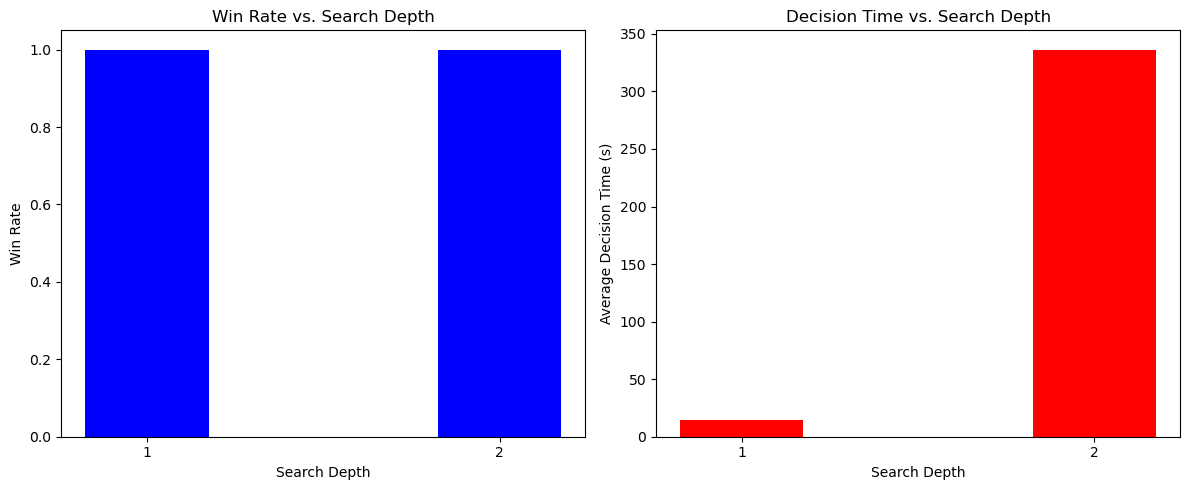

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming depths, win_rates, and decision_times are already populated as in your code
width = 0.35  # the width of the bars

# Plotting results
plt.figure(figsize=(12, 5))

# Bar chart for Win Rates
plt.subplot(1, 2, 1)
plt.bar(depths, win_rates, width, color='blue')
plt.xlabel('Search Depth')
plt.ylabel('Win Rate')
plt.title('Win Rate vs. Search Depth')
plt.xticks(depths)  # Ensure ticks match your depths

# Bar chart for Average Decision Times
plt.subplot(1, 2, 2)
plt.bar(depths, decision_times, width, color='red')
plt.xlabel('Search Depth')
plt.ylabel('Average Decision Time (s)')
plt.title('Decision Time vs. Search Depth')
plt.xticks(depths)  # Ensure ticks match your depths

plt.tight_layout()
plt.show()